In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

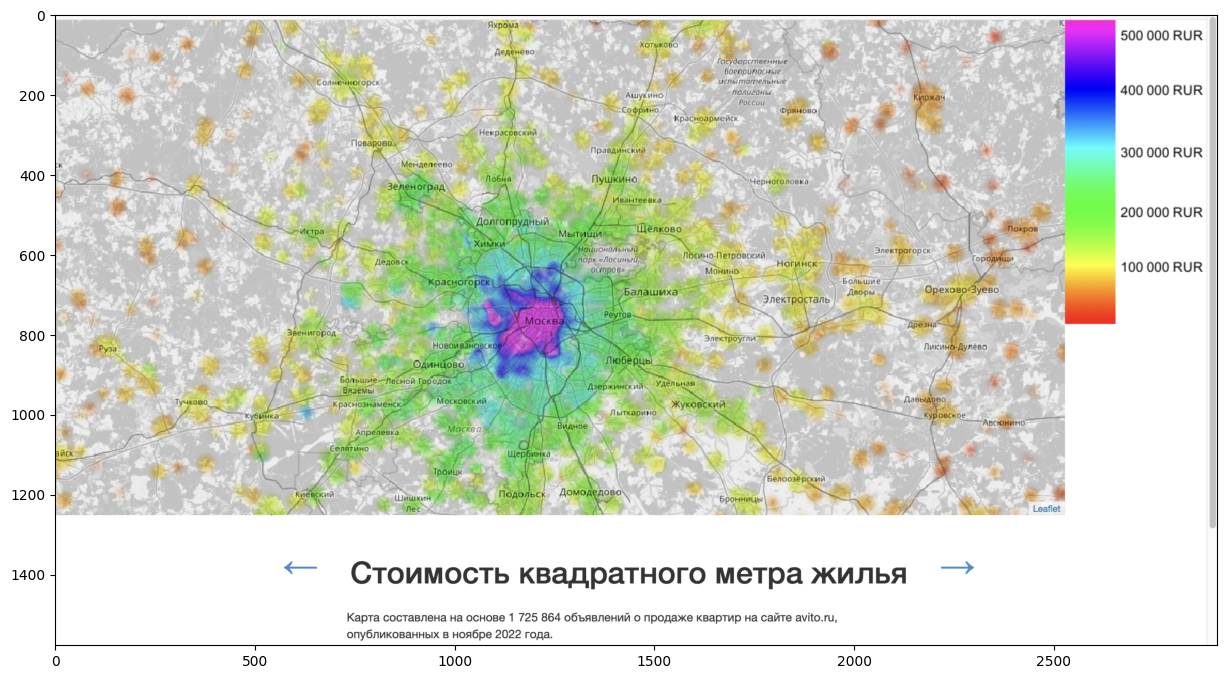

In [ ]:
im = Image.open('file.png')
plt.figure(figsize = (15,15))
plt.imshow(im)

# KNN

## Формальное описание алгоритма

1) Вычислить расстояние до каждого обьекта в выборе\
2) Отобрать k наиболее ближайших соседей\
3) Усреднить таргет для задачи регрессии или выбрать наиболее частое для классификации.\
Для корректной работы обязательно отнормировать признаки.

## Гиперпараметры

weights: "uniform" (все веса равны) \
"distance" (вес обратно пропорционален расстоянию до тестового примера) или другая определенная пользователем функция\
n_neighbors : 5 \
metric: "minkowski", "manhattan", "euclidean", "chebyshev" и другие\


Плюсы: \
Быстро обучается \
Минусы: \
Проклятие размерности\

## Где используется

Везде :) Напрямую в ml нет, так как алгоритма слабоват, но вот для чего подходит\
1 использовать его предикты как фичи в более сильных алгоритмах\
2 искать наиболее релевантные айтемы (например в рекомендательных системах)\
3 заполнять пропуски

## Практика - задача Алексея

In [53]:
from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [130]:
train_data = pd.read_csv('/content/data_train.csv')
val_data = pd.read_csv('/content/data_val.csv')

In [131]:
train_data = train_data.replace('?', None)
val_data = val_data.replace('?', None)

train_data_nn= train_data.dropna()
val_data_nn = val_data.dropna()

In [132]:
X_train = train_data_nn.drop('res', axis = 1)
X_train['x35'] = X_train['x35'].apply(lambda x : float(x))
y_train = train_data_nn['res']

X_val = val_data_nn.drop('res', axis = 1)
X_val['x35'] = X_val[['x35']].astype(float)
y_val = val_data_nn['res']

In [164]:
model = CatBoostClassifier(verbose = 0)
model.fit(X_train, y_train)

In [165]:
accuracy_score(model.predict(X_val), y_val)

0.4115755627009646

С knn

In [166]:
from sklearn.preprocessing import StandardScaler

In [168]:
X_train = train_data.drop('res', axis = 1)
y_train = train_data['res']

X_val = val_data.drop('res', axis = 1)
y_val = val_data['res']

scal = StandardScaler()
X_train[X_train.columns] = scal.fit_transform(X_train[X_train.columns])
X_val[X_val.columns] = scal.transform(X_val[X_val.columns])

X_train['x35'] = X_val[['x35']].astype(float)
X_val['x35'] = X_val[['x35']].astype(float)

In [169]:
imp = KNNImputer()
X_train[X_train.columns] = imp.fit_transform(X_train[X_train.columns])
X_val[X_val.columns] = imp.transform(X_val[X_val.columns])

In [171]:
model = CatBoostClassifier(verbose = 0)
model.fit(X_train, y_train)

In [172]:
accuracy_score(model.predict(X_val), y_val)

0.42409638554216866

Бонус с knn)

In [175]:
X_train = train_data_nn.drop('res', axis = 1)
X_train['x35'] = X_train['x35'].apply(lambda x : float(x))
y_train = train_data_nn['res']

X_val = val_data_nn.drop('res', axis = 1)
X_val['x35'] = X_val[['x35']].astype(float)
y_val = val_data_nn['res']

In [176]:
model = KNeighborsClassifier(11, weights = 'distance')
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=11, weights='distance')

In [177]:
accuracy_score(model.predict(X_val), y_val)

0.49517684887459806

# SVM

Рассмотрим задачу классификации.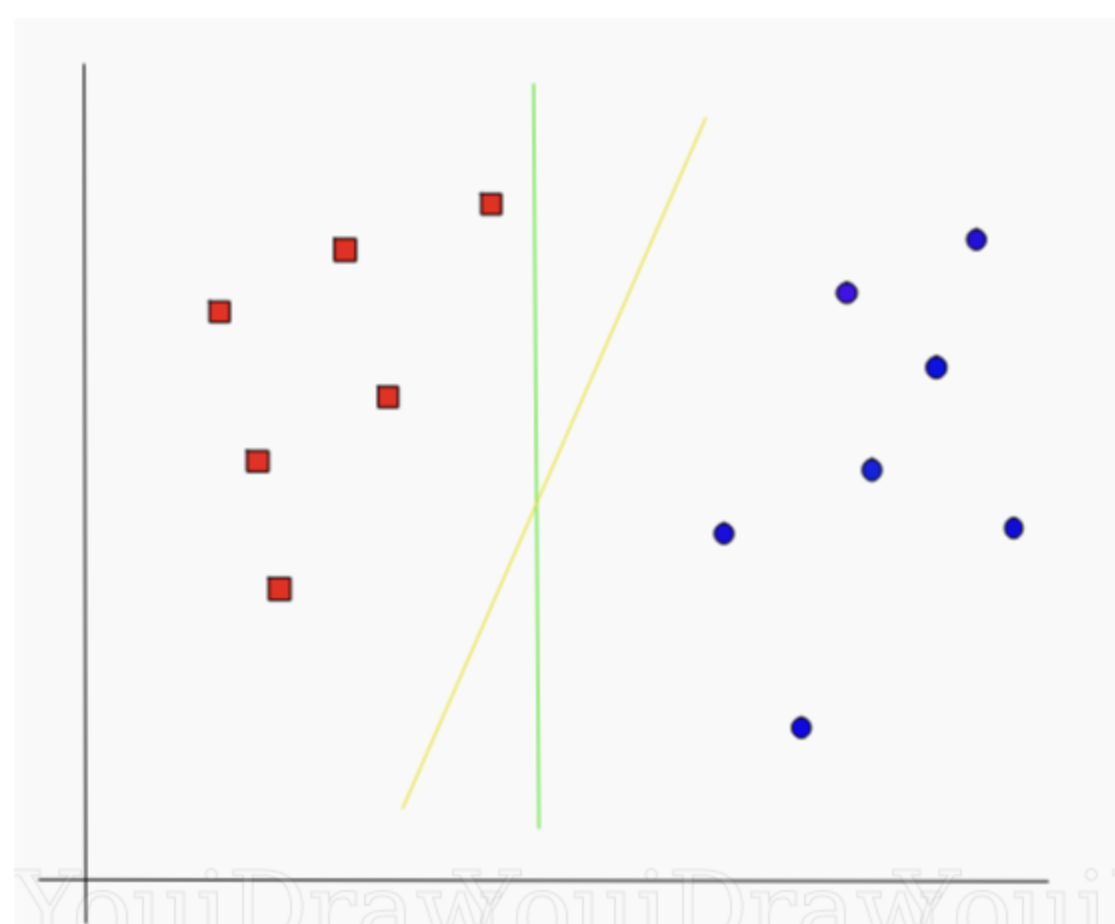

Поход к решению с помощью SVM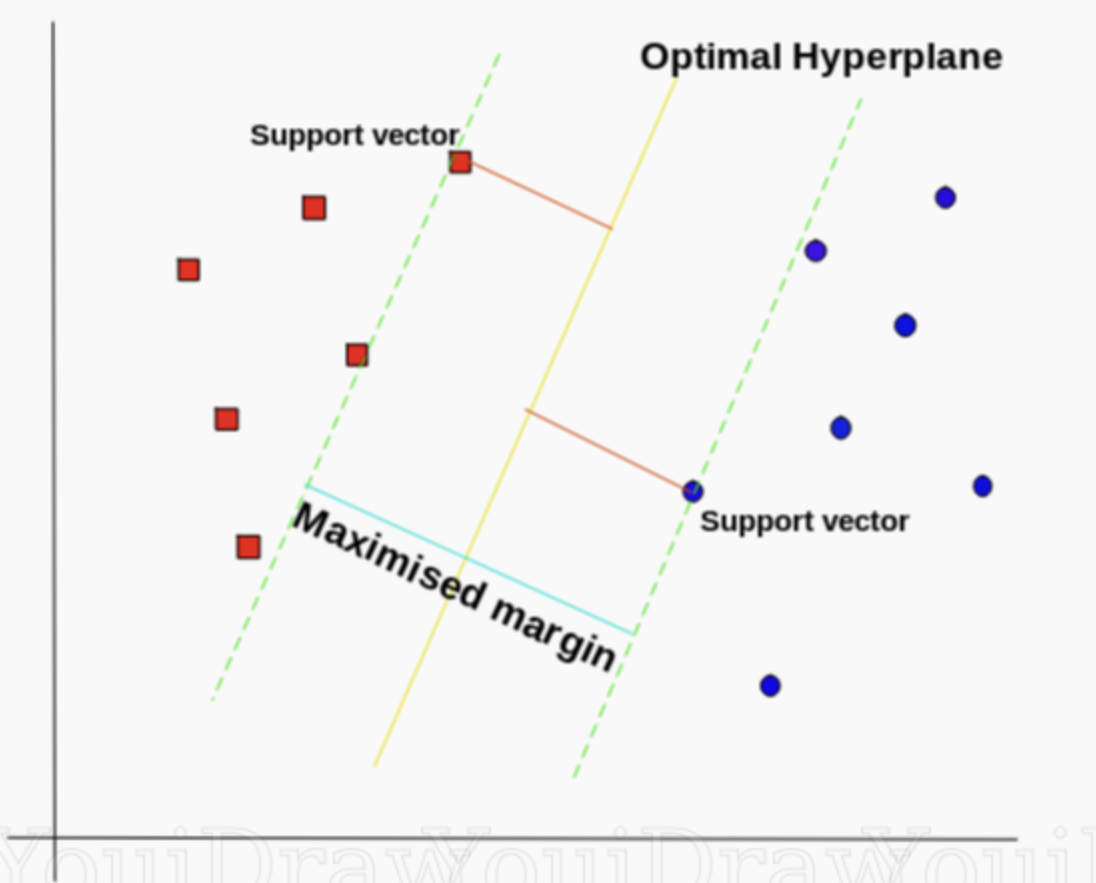

Гиперпараметры

C - величина обратная l2 регуляризации. Чем больше - тем более нелинейная разделающая поверхность

kernel{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’} - тип ядра (базисных функций)

degree - степень для 'poly' ядра\
gamma{‘scale’, ‘auto’} - по сути коэффициент, который определяет насколько далекие значения учитываются. Чем выше - тем меньше элементов

Плюсы:\
Хорошо работает с данными выскоих размерностей\
Улавливает нелинейные зависимости\
Слабо переобучается\
Минусы:\
Долго обучается\
Есть более сильные и быстрые алгоритмы

# Сравнение knn и svr в распознавании чисел

In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [76]:
from sklearn.datasets import load_digits

data = load_digits()
X, y = data.data, data.target

In [49]:
scale = StandardScaler()

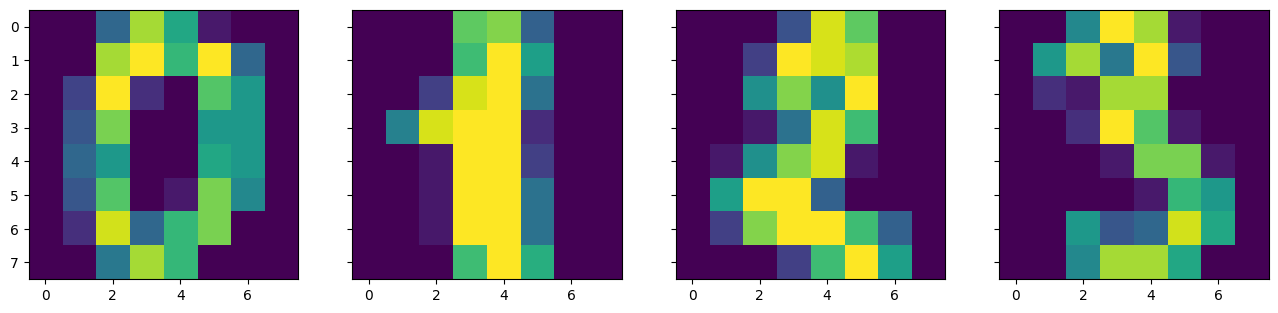

In [43]:
f, axes = plt.subplots(1, 4, sharey=True, figsize=(16,6))
for i in range(4):
  axes[i].imshow(X[i,:].reshape([8,8]));

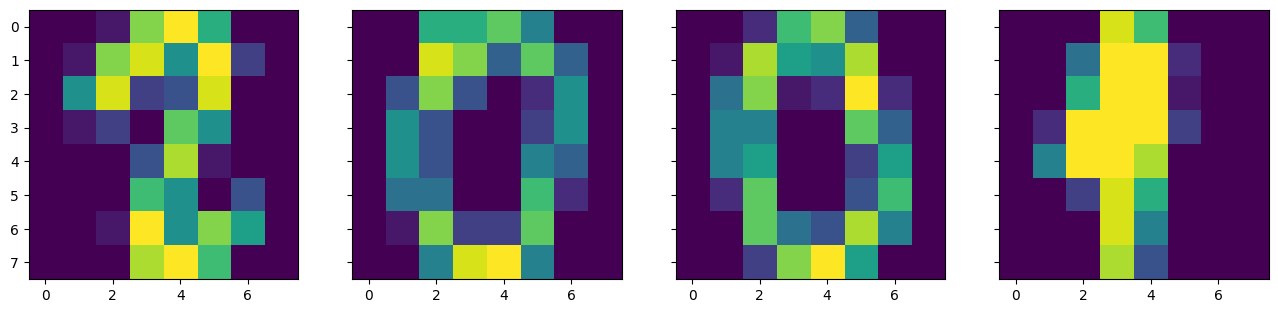

In [77]:
f, axes = plt.subplots(1, 4, sharey=True, figsize=(16,6))
for i in range(4):
  axes[i].imshow(X_train[i,:].reshape([8,8]));

Данные с standard scaler

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
random_state=17)

In [79]:
X_train_scale = scale.fit_transform(X_train)
X_test_scale = scale.transform(X_test)

In [80]:
knn = KNeighborsClassifier()

In [81]:
knn.fit(X_train_scale, y_train)
accuracy_score(knn.predict(X_test_scale), y_test)

0.9833333333333333

Без standard scaler

In [82]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
accuracy_score(knn.predict(X_test), y_test)

0.9814814814814815

In [83]:
svm = SVC()

С standard scaler

In [84]:
svm.fit(X_train_scale, y_train)
accuracy_score(svm.predict(X_test_scale), y_test)

0.9796296296296296

Без standard scaler

In [85]:
svm.fit(X_train, y_train)
accuracy_score(svm.predict(X_test), y_test)

0.9814814814814815